In [1]:
# This program performs the Auger fitting

from CeyerLibrary import loadAuger, generateDict, index_of, derivativeGaussian
from lmfit import Model
from lmfit.models import LinearModel, GaussianModel, LorentzianModel, ExponentialModel, VoigtModel
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# Set up the dictionary
monthDict = generateDict()  

In [2]:
# Important Parameters

filename = 'sep28_17.a02'

In [5]:
#%% Import and clean data
filefolder = '/Users/qingliu/Dropbox (MIT)/littlemachine/'
filepath = filefolder + '20' + filename[6:8] + '/' + monthDict[filename[:3]] + '_' + filename[:3] + '/' + filename
filehandle = open(filepath)
data = loadAuger(filepath)

counts = data[:,1]
energy = data[:,0]

ix1 = index_of(energy, 52) + 1 # index_of return index of array *at or below* value, +1 here
ix2 = index_of(energy, 72) + 1

x = energy[ix1:ix2]
y = counts[ix1:ix2]



In [6]:
#%% Constuct fitting model
background  = LinearModel()

pars = background.make_params()
pars['slope'].set(0, min = -1e-12, max = 1e-16)
pars['intercept'].set(0, min = -3, max = 5)

featureNi = Model(derivativeGaussian, prefix = 'Ni_')

pars.update(featureNi.make_params())
pars['Ni_cen'].set(55, min=53, max=65)
pars['Ni_wid'].set(3, min=2, max = 10)
pars['Ni_amp'].set(5, min=0, max = 10)

featureAu = Model(derivativeGaussian, prefix = 'Au_')

pars.update(featureAu.make_params())
pars['Au_cen'].set(67, min=60, max=75)
pars['Au_wid'].set(3, min=2, max = 10)
pars['Au_amp'].set(5, min=0, max = 10)

model = background + featureNi + featureAu

/Users/qingliu/anaconda/envs/py35/lib/python3.5/site-packages/lmfit/printfuncs.py:140: RuntimeWarning: invalid value encountered in double_scalars
  spercent = '({0:.2%})'.format(abs(par.stderr/par.value))


[[Model]]
    ((Model(linear) + Model(derivativeGaussian, prefix='Ni_')) + Model(derivativeGaussian, prefix='Au_'))
[[Fit Statistics]]
    # function evals   = 66
    # data points      = 65
    # variables        = 8
    chi-square         = 0.005
    reduced chi-square = 0.000
    Akaike info crit   = -600.018
    Bayesian info crit = -582.623
[[Variables]]
    intercept:   1.95684044 +/- 0        (0.00%) (init= 0)
    slope:       0          +/- 0        (nan%) (init= 0)
    Ni_amp:      0.14442082 +/- 0        (0.00%) (init= 5)
    Ni_cen:      56.7498026 +/- 0        (0.00%) (init= 55)
    Ni_wid:      3.88357204 +/- 0        (0.00%) (init= 3)
    Au_amp:      0.09721283 +/- 0        (0.00%) (init= 5)
    Au_cen:      66.9406274 +/- 0        (0.00%) (init= 67)
    Au_wid:      3.33695631 +/- 0        (0.00%) (init= 3)



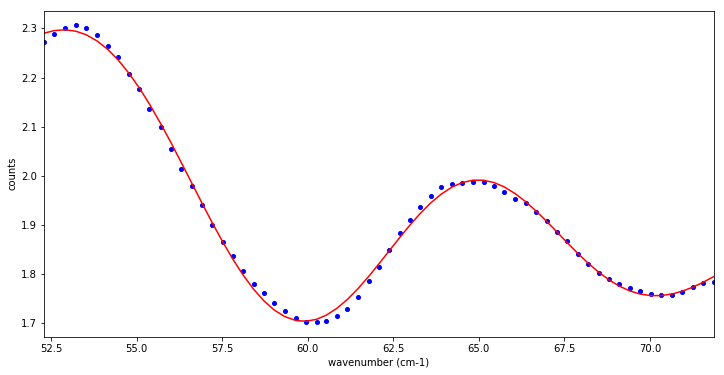

In [7]:
#%% Curve fitting 
result  = model.fit(y, pars, x=x)

#%% Print fitting results
print(result.fit_report(min_correl=0.25))

#%% Plot fitting results
fig = plt.figure(figsize=(12,6))
plt.plot(x, y, 'bo', markersize = 4)
plt.plot(x, result.best_fit, 'r-')
plt.xlabel('wavenumber (cm-1)')
plt.ylabel('counts')
plt.xlim(min(x), max(x))
plt.show()



In [8]:

#%% Export results to PDF 
#pp = PdfPages('multipage.pdf')
#pp.savefig(fig)
#
#pp.close()